In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("./Wine_red.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
features = df.drop('quality',axis=1)
target = df.quality

In [6]:
features = (features - features.mean()) / features.std()

In [7]:
knn = KNeighborsRegressor()

In [12]:
neighbors = np.arange(1,1000,10)
grid = {'n_neighbors':neighbors}

In [15]:
knnCV = GridSearchCV(knn,param_grid=grid,n_jobs=-1,return_train_score=True)

In [16]:
knnCV.fit(features,target)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': array([  1,  11, ..., 981, 991])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [17]:
knnCV.best_score_

0.3037422003703932

In [19]:
results = knnCV.cv_results_

In [20]:
results['mean_test_score'].shape

(100,)

In [24]:
performance = pd.DataFrame()
performance['neighbors'] = neighbors
performance['R2_train'] = results['mean_train_score']
performance['R2_test'] = results['mean_test_score']
performance.head(3)

,neighbors,R2_train,R2_test
0,1,1.000000,-0.247165
1,11,0.445349,0.253882
2,21,0.400450,0.280487


In [25]:
knnCV.best_params_

{'n_neighbors': 61}

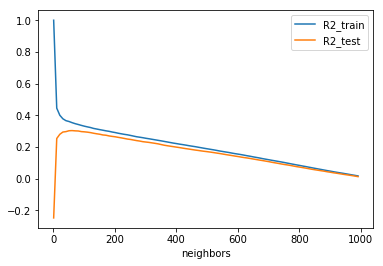

In [27]:
ax1 = performance.plot.line(x='neighbors',y='R2_train')
performance.plot.line(x='neighbors',y='R2_test',ax=ax1)

In [28]:
knnCV = GridSearchCV(knn,param_grid=grid,n_jobs=-1,return_train_score=True,scoring='neg_mean_squared_error')

In [29]:
knnCV.fit(features,target)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': array([  1,  11, ..., 981, 991])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [30]:
RNSE_train = np.sqrt(-1*knnCV.cv_results_['mean_train_score'])
RNSE_train = np.sqrt(-1*knnCV.cv_results_['mean_test_score'])

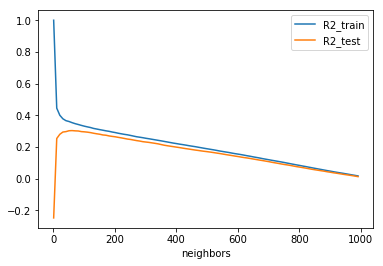

In [31]:
np.sqrt(-1*k)